#Artificial Neural Network Regression Problem

##Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df=pd.read_excel("/content/drive/MyDrive/Dataset/Folds5x2_pp.xlsx",sheet_name='Sheet1')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

##Splitting Dataset and Feature Scaling

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Building ANN

In [5]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(1))

In [6]:
ann.compile(optimizer='adam',loss='mae')
history=ann.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
225/225 [==============================] - 1s 3ms/step - loss: 453.5407 - val_loss: 451.9549
Epoch 2/30
225/225 [==============================] - 0s 2ms/step - loss: 447.0372 - val_loss: 439.2348
Epoch 3/30
225/225 [==============================] - 0s 2ms/step - loss: 423.3246 - val_loss: 403.4842
Epoch 4/30
225/225 [==============================] - 0s 2ms/step - loss: 372.2393 - val_loss: 337.5204
Epoch 5/30
225/225 [==============================] - 0s 2ms/step - loss: 311.9876 - val_loss: 301.7618
Epoch 6/30
225/225 [==============================] - 0s 2ms/step - loss: 293.2028 - val_loss: 292.8718
Epoch 7/30
225/225 [==============================] - 0s 2ms/step - loss: 284.5416 - val_loss: 284.3954
Epoch 8/30
225/225 [==============================] - 0s 2ms/step - loss: 274.9615 - val_loss: 273.5976
Epoch 9/30
225/225 [==============================] - 0s 2ms/step - loss: 262.0924 - val_loss: 257.4669
Epoch 10/30
225/225 [==============================] - 0s 2ms/st

##Predicting for Test dataset

In [7]:
y_pred=ann.predict(X_test);
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

3.5557797394309154

##Visualize Model

[]

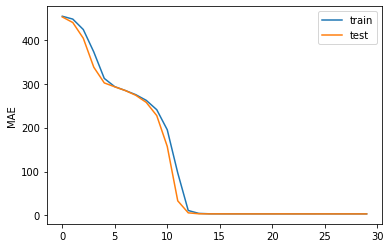

In [8]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.ylabel("MAE")
plt.legend()
plt.plot()

In [9]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


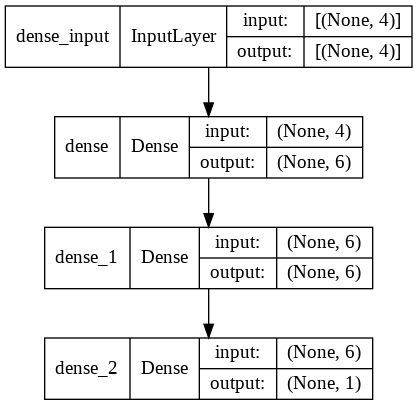

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(ann,show_shapes=True)